In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("uber-raw-data-apr14.csv")

In [3]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [5]:
date= '4/30/2014 23:22:00'
date

'4/30/2014 23:22:00'

In [6]:
dat, time = date.split(" ")
print(dat)
print(time)

4/30/2014
23:22:00


In [7]:
m,d,y = dat.split('/')

In [8]:
int(d)

30

In [9]:
#efficient way to do it
date= '4/30/2014 23:22:00'
dt = pd.to_datetime(date)

In [10]:
dt.weekday()

2

In [11]:
dt.weekday_name

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


'Wednesday'

In [12]:
dt.month

4

In [13]:
dt.day

30

In [14]:
#week of the year
dt.week

18

In [15]:
#conversion to date tim

In [16]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [17]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [18]:
def day_of_month(det):
    return det.day

data['Day_of_month'] = data['Date/Time'].map(day_of_month)

In [19]:
data.head()

,Date/Time,Lat,Lon,Base,Day_of_month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [20]:
def get_weekday(det):
    return det.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(det):
    return det.hour
data['hour'] = data['Date/Time'].map(get_hour)

In [21]:
data.head()

,Date/Time,Lat,Lon,Base,Day_of_month,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


In [22]:
data.tail()

,Date/Time,Lat,Lon,Base,Day_of_month,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


In [ ]:
#ANALYSIS

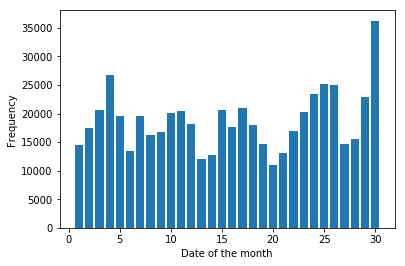

In [38]:
#Analyze the day_of_month
plt.hist(data['Day_of_month'],bins=30,rwidth=0.8,range=(0.5,30.5))
plt.xlabel("Date of the month")
plt.ylabel("Frequency")
plt.show()

In [45]:
for k,rows in data.groupby('Day_of_month'):
    print((k,len(rows)))


(1, 14546)
(2, 17474)
(3, 20701)
(4, 26714)
(5, 19521)
(6, 13445)
(7, 19550)
(8, 16188)
(9, 16843)
(10, 20041)
(11, 20420)
(12, 18170)
(13, 12112)
(14, 12674)
(15, 20641)
(16, 17717)
(17, 20973)
(18, 18074)
(19, 14602)
(20, 11017)
(21, 13162)
(22, 16975)
(23, 20346)
(24, 23352)
(25, 25095)
(26, 24925)
(27, 14677)
(28, 15475)
(29, 22835)
(30, 36251)


In [46]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby("Day_of_month").apply(count_rows)
by_date

Day_of_month
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

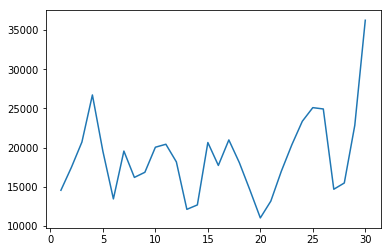

In [47]:
plt.plot(by_date)

<BarContainer object of 30 artists>

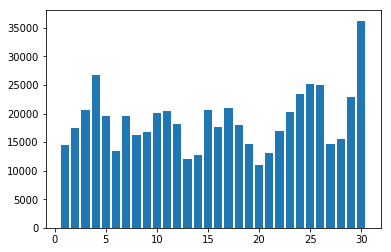

In [48]:
plt.bar(range(1,31), by_date)

In [52]:
sorted_date = by_date.sort_values()
sorted_date

Day_of_month
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

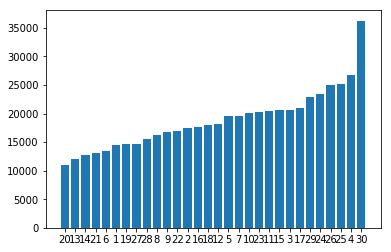

In [81]:
plt.bar(range(1,31), sorted_date)
plt.xticks(range(1,31),sorted_date.index)
#plt.figure(figsize=(100,80))
plt.show()

In [ ]:
#ANalysis by hour

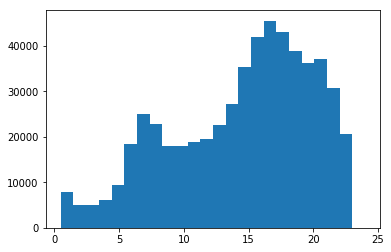

In [69]:
plt.hist(data.hour,bins=24,range=(0.5,24))
plt.show()

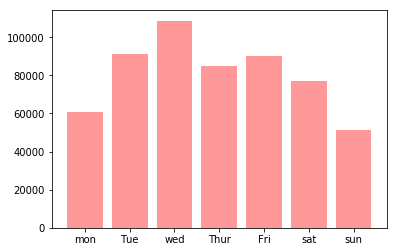

In [85]:
#Analyze by weekday
plt.hist(data.weekday,bins=7,range=(-0.5,6.5),rwidth=0.8,color='red',alpha=0.4)
plt.xticks(range(7),"mon Tue wed Thur Fri sat sun".split())
plt.show()

In [ ]:
#cross analysis (hour,day_of_month)

In [88]:
data.groupby('weekday hour'.split()).apply(count_rows).unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


In [89]:
cross_analysis = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

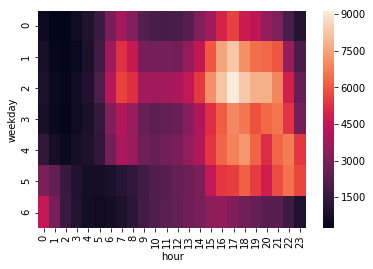

In [92]:
sns.heatmap(cross_analysis)

In [93]:
data.head(1)

,Date/Time,Lat,Lon,Base,Day_of_month,weekday,hour
0,2014-04-01 00:11:00,40.769,-73.9549,B02512,1,1,0


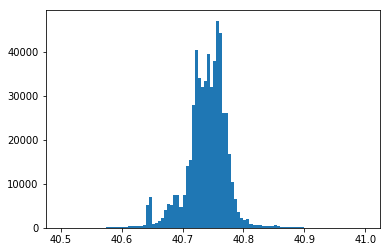

In [97]:
#ANalysisi by lat and lon
plt.hist(data['Lat'],bins=100,range=(40.5,41))
plt.show()

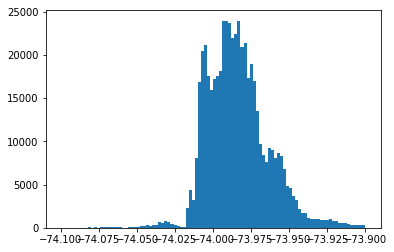

In [100]:
plt.hist(data['Lon'],bins=100,range=(-74.1,-73.9))
plt.show()

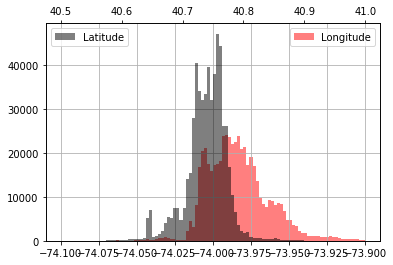

In [116]:
plt.hist(data['Lon'],bins=100,range=(-74.1,-73.9),color='red',alpha=0.5,label="Longitude")
plt.grid()
plt.legend(loc='best')
plt.twiny()
plt.hist(data['Lat'],bins=100,range=(40.5,41),color='black',alpha=0.5,label="Latitude")
plt.legend(loc='upper left')
plt.show()

(0, 100)

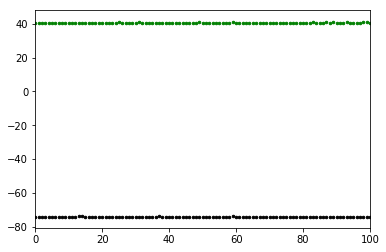

In [127]:
plt.plot(data['Lat'], '.',ms=5,color='green',label="Lat")
plt.plot(data['Lon'], '.',ms=5,color='black',label="lon")
plt.xlim(0,100)

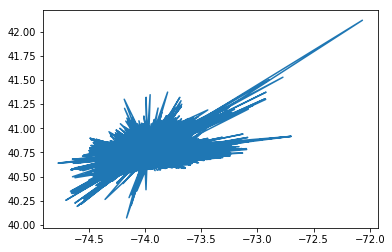

In [131]:
plt.plot(data['Lon'],data['Lat'])

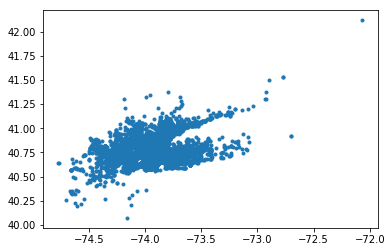

In [133]:
plt.plot(data['Lon'],data['Lat'],'.')

(40.5, 41.5)

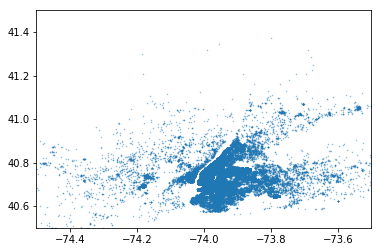

In [137]:
plt.plot(data['Lon'],data['Lat'],'.',ms=1,alpha=.5)
plt.xlim(-74.5,-73.5)
plt.ylim(40.5,41.5)

(40.5, 41.5)

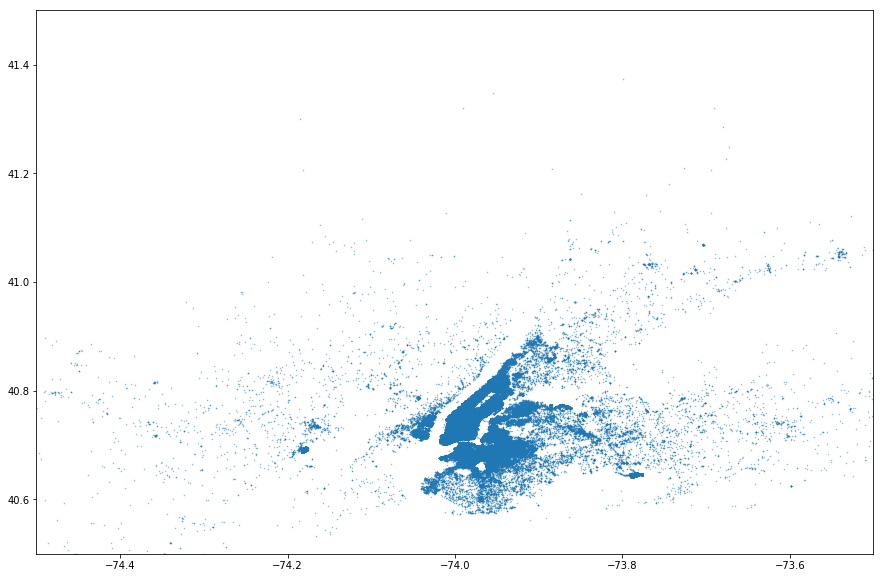

In [138]:
plt.figure(figsize=(15,10))
plt.plot(data['Lon'],data['Lat'],'.',ms=1,alpha=.5)
plt.xlim(-74.5,-73.5)
plt.ylim(40.5,41.5)